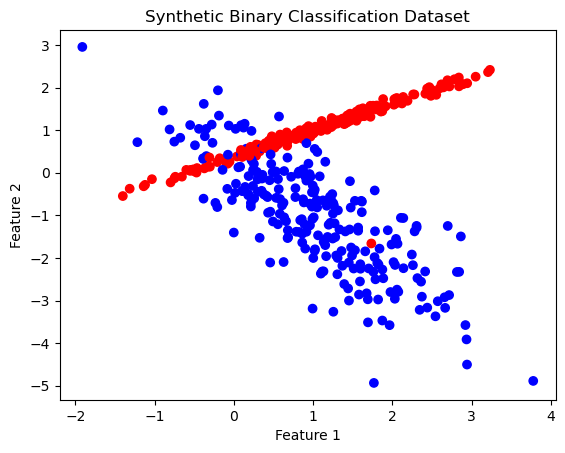

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_sk = LogisticRegression()
model_sk.fit(X_train, y_train)


LogisticRegression()

In [5]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = (-y @ np.log(h)) - ((1 - y) @ np.log(1 - h))
    return cost / m

# Gradient descent
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    X = np.insert(X, 0, 1, axis=1)  # Add intercept
    weights = np.zeros(X.shape[1])
    m = len(y)

    for _ in range(epochs):
        h = sigmoid(X @ weights)
        gradient = (X.T @ (h - y)) / m
        weights -= alpha * gradient

    return weights

# Train custom logistic regression
weights = gradient_descent(X_train, y_train)


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions from sklearn
y_pred_sk = model_sk.predict(X_test)

# Predictions from scratch
X_test_custom = np.insert(X_test, 0, 1, axis=1)
y_pred_custom = (sigmoid(X_test_custom @ weights) >= 0.5).astype(int)

# Evaluation
print("Sklearn Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sk))
print("Classification Report:\n", classification_report(y_test, y_pred_sk))

print("\nCustom Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))


Sklearn Logistic Regression:
Accuracy: 0.88
Confusion Matrix:
 [[45  6]
 [ 6 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.88      0.88      0.88        49

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100


Custom Logistic Regression:
Accuracy: 0.88
Confusion Matrix:
 [[44  7]
 [ 5 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        51
           1       0.86      0.90      0.88        49

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



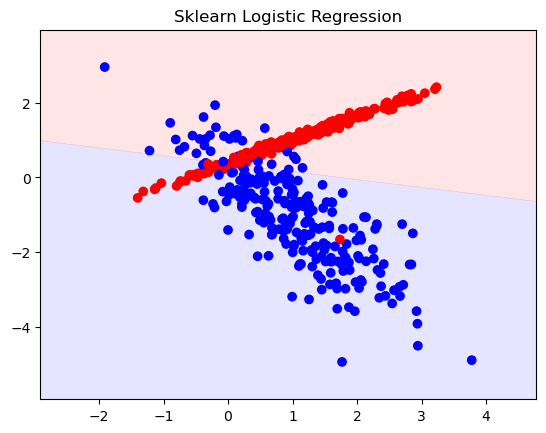

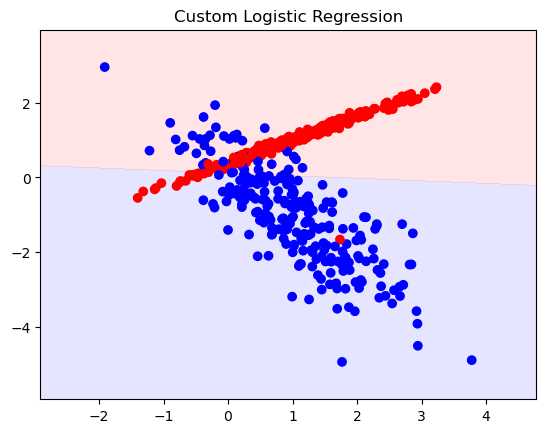

In [9]:
import numpy as np

def plot_decision_boundary(model, X, y, title="Decision Boundary", custom=False, weights=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if custom:
        grid_aug = np.insert(grid, 0, 1, axis=1)
        probs = sigmoid(grid_aug @ weights).reshape(xx.shape)
    else:
        probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='bwr', alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title(title)
    plt.show()

# Visualize both
plot_decision_boundary(model_sk, X, y, title="Sklearn Logistic Regression")
plot_decision_boundary(None, X, y, title="Custom Logistic Regression", custom=True, weights=weights)
